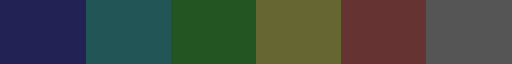

In [29]:
from pypalettes import pypalettes
purr = pypalettes()
cmap = purr.load_cmap('dark')
cmap

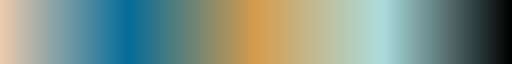

In [22]:
from pypalettes import pypalettes

purr = pypalettes()
cmap = purr.load_cmap('Darjeeling2', type='continuous')
cmap

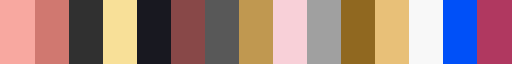

In [23]:
from pypalettes import pypalettes

purr = pypalettes()
cmap = purr.load_cmap()
cmap

In [24]:
from pypalettes import pypalettes

purr = pypalettes()
purr.source('bilbao')

'The R package: {khroma}'

In [25]:
from pypalettes import pypalettes

purr = pypalettes()
purr.hex('pupitar')

['#7098C0FF',
 '#88C0E8FF',
 '#285880FF',
 '#B8E0F8FF',
 '#F8F8F8FF',
 '#404060FF',
 '#A8A8A8FF',
 '#C8C8D0FF',
 '#B04000FF']

In [26]:
from pypalettes import pypalettes

purr = pypalettes()
purr.rgb('AirNomads')

[(255, 153, 51),
 (194, 72, 65),
 (255, 255, 51),
 (139, 91, 69),
 (135, 175, 209),
 (238, 176, 90),
 (219, 197, 160)]

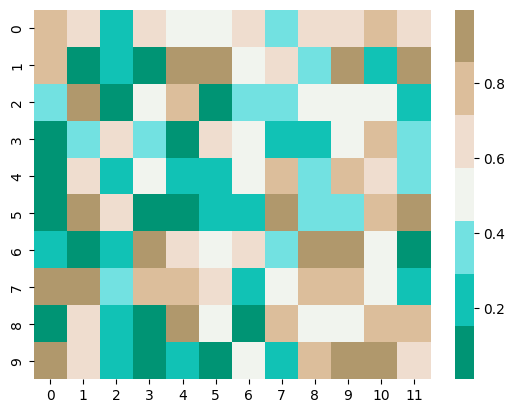

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from pypalettes import pypalettes
import numpy as np

data = np.random.rand(10, 12)

purr = pypalettes()
cmap = purr.load_cmap('Anemone')

sns.heatmap(data, cmap=cmap)
plt.savefig('images/heatmap.png', dpi=300, bbox_inches='tight')
plt.show()